<a href="https://colab.research.google.com/github/austinbennysmith/OSOM-ERDDAP/blob/master/RIDDC_ERDDAP_%22Plankton_Time_Series%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook uses the "Plankton Time Series" dataset in the [RIDDC ERDDAP server](https://pricaimcit.services.brown.edu/erddap/index.html). This is buoy data from a single location in Narragansett Bay. The code will graph surface and bottom chlorophyll values over time. As you can see in the graph below, typically there is more chlorophyll at the surface, which should make sense intuitively.

First, some imports and installations:

In [ ]:
!pip install netCDF4
import matplotlib.pyplot as plt
import requests
from netCDF4 import Dataset as NetCDFFile
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import datetime
from datetime import datetime as dt

[41.567222]


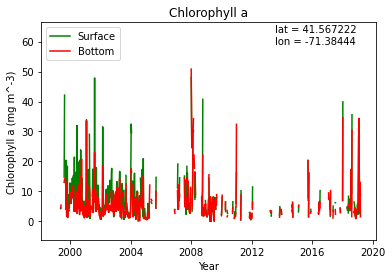

In [6]:
#mounting Google Drive in order to save images:
'''from google.colab import drive
drive.mount('/content/gdrive')
images_dir = '/content/gdrive/Shared drives/BFK_BOG/SURF_UG/Benny/Images/Phytoplankton_averages/Buoy Data'''
#url is copied from the RIDDC interactive url generator
url = 'https://pricaimcit.services.brown.edu/erddap/tabledap/plankton_time_series_7615_c513_ef8e.nc?time%2CChlorophyllSurface%2Cstation_name%2CChlorophyllBottom%2Clatitude%2Clongitude&time%3E=1960-04-01&time%3C=2019-03-11T08%3A00%3A00Z&latitude%3E=40.5&latitude%3C=42.25&longitude%3E=-72.75&longitude%3C=-69.75'
r = requests.get(url, allow_redirects=True)
open('test.nc', 'wb').write(r.content)
nc = NetCDFFile('test.nc')
nc
timearray = []
time = nc.variables['time'][:]
station_name = nc.variables['station_name'][:]
for i in time:
  timearray.append(dt.fromtimestamp(i))
#getting the surface & bottom variables:
chlasurf = nc.variables['ChlorophyllSurface'][:]
chlabot = nc.variables['ChlorophyllBottom'][:]
lat = nc.variables['latitude'][:]
lon = nc.variables['longitude'][:]
#Removing duplicate entries in the latitude & longitude lists so that I can use them to put text in the graph that tells latitude & longitude:
lat = list(dict.fromkeys(lat))
lon = list(dict.fromkeys(lon))
#coordstring, defined below using the lat & lon variables, is the text I'll put on the graph
coordstring = '''lat = '''+str(lat)+'''
lon = '''+str(lon)
coordstring = coordstring.replace('[', '')
coordstring = coordstring.replace(']', '')
fig, ax = plt.subplots()
ax.text(0.7, 0.9, coordstring, transform = ax.transAxes)
plt.plot(timearray, chlasurf, label = 'Surface', color = 'green')
plt.plot(timearray, chlabot, label = 'Bottom', color = 'red')
plt.legend(loc='best')
plt.title('Chlorophyll a')
plt.xlabel('Year')
plt.ylabel('Chlorophyll a (mg m^-3)')
#plt.savefig(f"{images_dir}/ERDDAP RIDDC Plankton Time Series.png")
plt.show()